In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
nums=pd.read_csv("trainum.csv")
test=pd.read_csv("digitest.csv")
display(nums)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(nums)

42000

In [4]:
len(test)

28000

In [5]:
y=nums['label']
x=nums.drop('label',axis=1)
x=x/255
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
display(x_train)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
7677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
model=Sequential([
    Dense(units=30,activation='relu'),
    Dense(units=20,activation='relu'),
    Dense(units=10,activation='sigmoid')
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8697 - loss: 0.4651
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9345 - loss: 0.2255
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9464 - loss: 0.1834
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9535 - loss: 0.1552
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9613 - loss: 0.1359
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9640 - loss: 0.1194
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9671 - loss: 0.1080
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9698 - loss: 0.0960
Epoch 9/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9735 - loss: 0.0871
Epoch 10/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9757 - loss: 0.0786
Epoch 11/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9775 - loss: 0.0730
Epoch 12/20
1050/1050 ━━━━━━━━

In [7]:
model.evaluate(x_test,y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9531 - loss: 0.1897


[0.1896517127752304, 0.9530952572822571]

In [8]:
test=test/255
predict=model.predict(test)
catpred=np.argmax(predict,axis=1)
digit1=pd.DataFrame({
    'Label':catpred.flatten()
})
digit1.index=digit1.index+1
print(digit1.head())
digit1.to_csv("digit3.csv",index_label='ImageId')

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
   Label
1      2
2      0
3      9
4      2
5      3


In [17]:
from PIL import Image,ImageOps

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Number prediction: 8


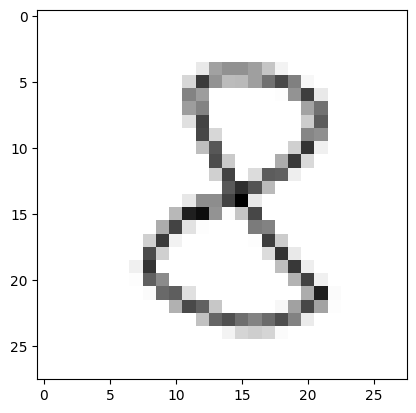

In [24]:
img=Image.open('digithw.png').convert('L')
img=img.resize((28,28))
plt.imshow(img,cmap='gray')
img=ImageOps.invert(img)
img_arr=np.array(img)
img_arr=img_arr/255
imgtest=img_arr.flatten().reshape(1,-1)
imgpred=model.predict(imgtest)
print("Number prediction:",imgpred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Number prediction: 4


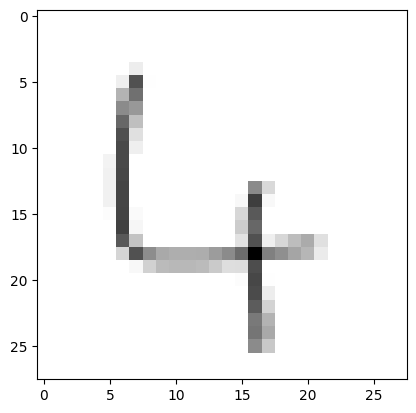

In [22]:
img=Image.open('dighw2.png').convert('L')
img=img.resize((28,28))
plt.imshow(img,cmap='gray')
img=ImageOps.invert(img)
img_arr=np.array(img)
img_arr=img_arr/255
imgtest=img_arr.flatten().reshape(1,-1)
imgpred=model.predict(imgtest)
print("Number prediction:",imgpred.argmax())